### HOMEWORK 15

In [11]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

#### Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


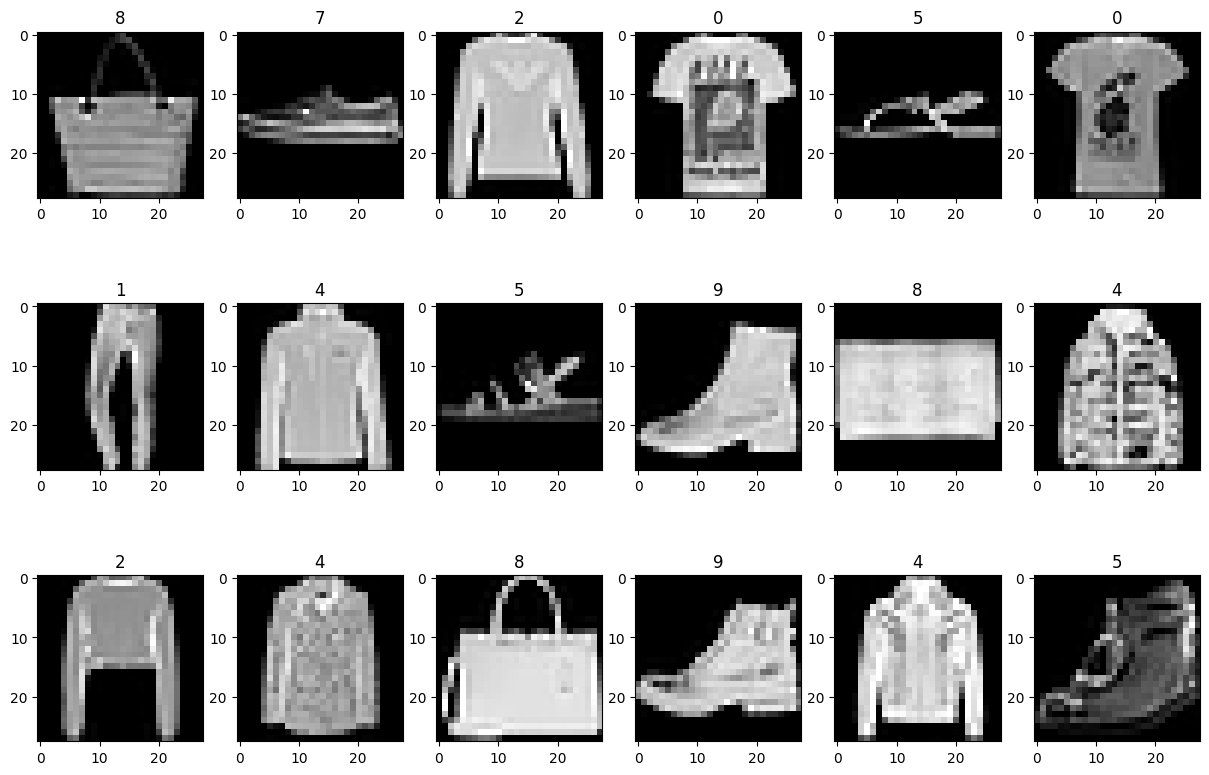

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

#### Building the Classifier

In [4]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [5]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,213,002 (12.26 MB)

 Trainable params: 3,213,002 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.8210 - loss: 0.5231 - val_accuracy: 0.8852 - val_loss: 0.3244
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9014 - loss: 0.2750 - val_accuracy: 0.8923 - val_loss: 0.3010
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9188 - loss: 0.2281 - val_accuracy: 0.8949 - val_loss: 0.3001
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9275 - loss: 0.1959 - val_accuracy: 0.8973 - val_loss: 0.3089
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9395 - loss: 0.1680 - val_accuracy: 0.8932 - val_loss: 0.3379
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9479 - loss: 0.1467 - val_accuracy: 0.8934 - val_loss: 0.3665
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9530 - loss: 0.1291 - val_accuracy: 0.8912 - val_loss: 0.3977
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9590 - loss: 0.1165 - 

Train Acc      0.9927833080291748
Validation Acc 0.8784999847412109


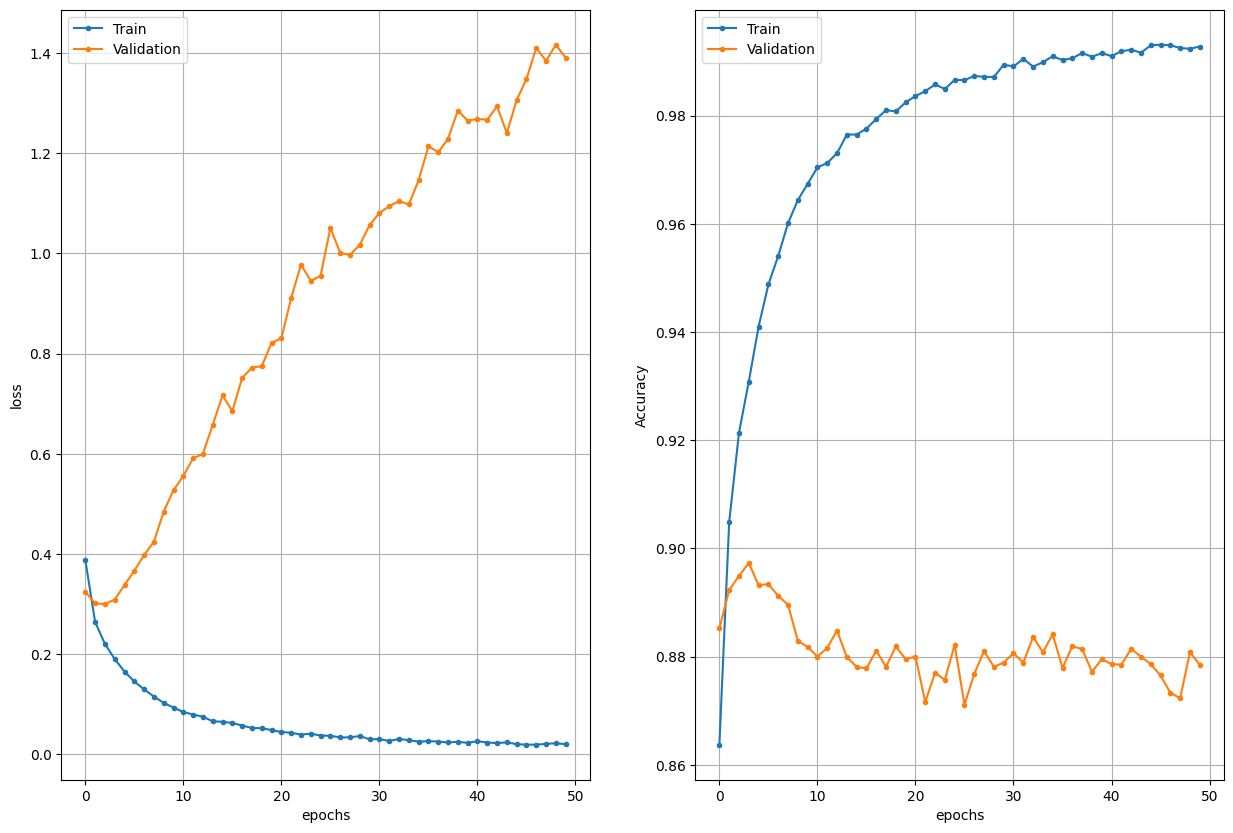

In [7]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

##### Combat the Overfitting!

In [8]:
from tensorflow.keras.regularizers import l2

inputs = Input(shape=(28, 28, 1))

# Convolutional block with dropout and batch normalization
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Dropout(0.5)(net)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)

# Flatten and use a dense layer with L2 regularization
net = Flatten()(net)
net = Dense(64, kernel_regularizer=l2(0.01))(net)
net = Dropout(0.5)(net)
net = BatchNormalization()(net)

# Output layer
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,826 (1.54 MB)

 Trainable params: 402,634 (1.54 MB)

 Non-trainable params: 192 (768.00 B)

In [9]:
# Train the network
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.7903 - loss: 1.1429 - val_accuracy: 0.8103 - val_loss: 0.7805
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.8440 - loss: 0.7048 - val_accuracy: 0.8263 - val_loss: 0.7454
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.8494 - loss: 0.6882 - val_accuracy: 0.8539 - val_loss: 0.6874
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8494 - loss: 0.6866 - val_accuracy: 0.8629 - val_loss: 0.6652
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8528 - loss: 0.6730 - val_accuracy: 0.8604 - val_loss: 0.6860
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.8517 - loss: 0.6608 - val_accuracy: 0.8632 - val_loss: 0.6490
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8549 - loss: 0.6563 - val_accuracy: 0.8681 - val_loss: 0.6370
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.8552 - loss: 0.6522 - 

Train Acc      0.8586500287055969
Validation Acc 0.8618999719619751


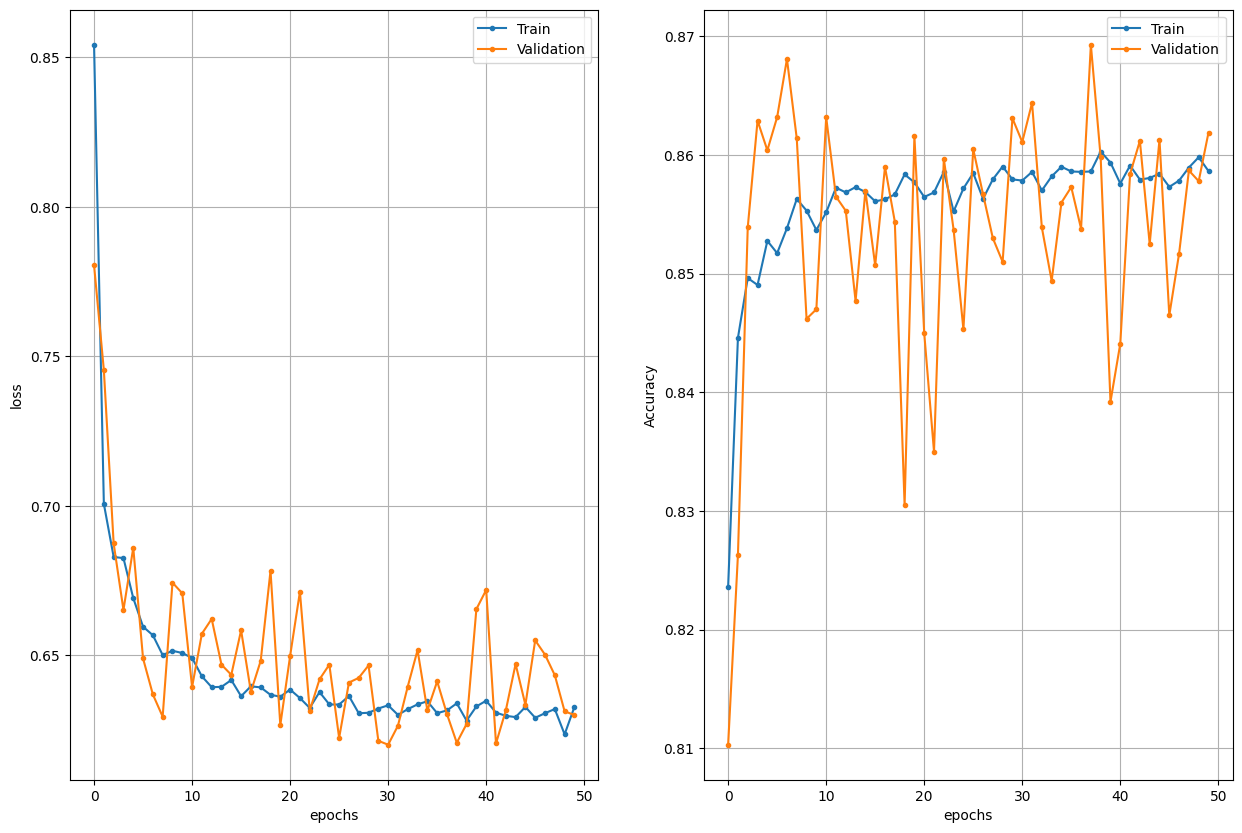

In [10]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

#### Question

##### What have you done in order to improve the performance?
- added Dropout layers to the model. During training, Dropout layers turn off a random subset of neurons with a specified probability. This prevents the network from becoming overly dependent on any one neuron and facilitates a more distributed, reliable understanding of the data.

- enabled batch normalization after extraction layers. Batch normalization scales neuronal activations such that the output distribution of each layer approximates the standard normal.

- added L2 regularization to dense layer. Regularization methods add a penalty to the loss function to discourage complex models. More specifically, L2 regularization encourages the weights to be small, which means that each input feature has less influence on the predictions and overfitting is reduced.

- to further control the retooling and reduce the computational complexity, I added a MaxPooling layer after the Convolution operation. This reduces the spatial size of the representation, thus reducing the number of parameters and computations in the network.

- to control the size of the network and thus reduce reconfiguration, I reduced the number of neurons in the dense layer from 128 to 64.

#### Have you tried configurations that did not work out?
- Nope